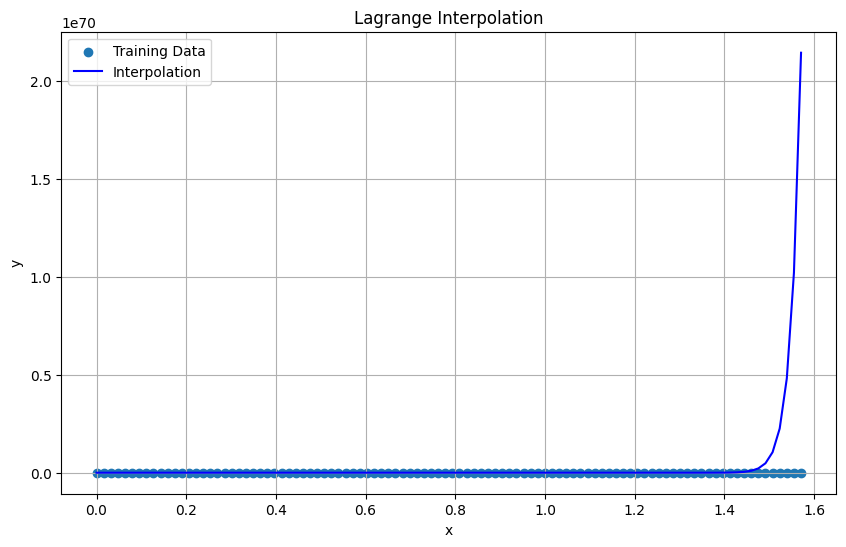

Training Error: 4.068367739607467e+68
Test Error: 4.068367739607467e+68


In [12]:
import numpy as np
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

a = 0
b = np.pi/2
n = 100

x_train = np.linspace(a, b, n)
y_train = np.sin(x_train)

# Lagrange interpolation model
f = lagrange(x_train, y_train)

# Generate a test set with the same distribution
x_test = np.linspace(a, b, n)
y_test = np.sin(x_test)

y_pred_train = f(x_train)
y_pred_test = f(x_test)

# Calculate training and test errors
train_error = np.mean(np.abs(y_train - y_pred_train))
test_error = np.mean(np.abs(y_test - y_pred_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', marker='o')
plt.plot(x_test, y_pred_test, label='Interpolation', color='blue', linestyle='solid')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()

print("Training Error:", train_error)
print("Test Error:", test_error)


Training Error (with noise, std_dev=0.1): 1.995539803743941e+69
Test Error (with noise, std_dev=0.1): 8.741240367768311e+70
Training Error (with noise, std_dev=0.5): 1.072649686794479e+82
Test Error (with noise, std_dev=0.5): 7.564530343860302e+87
Training Error (with noise, std_dev=1.0): 3.1293935031750174e+70
Test Error (with noise, std_dev=1.0): 9.812763980942476e+67
Training Error (with noise, std_dev=2.0): 3.825448351025235e+60
Test Error (with noise, std_dev=2.0): 2.80163575024614e+60


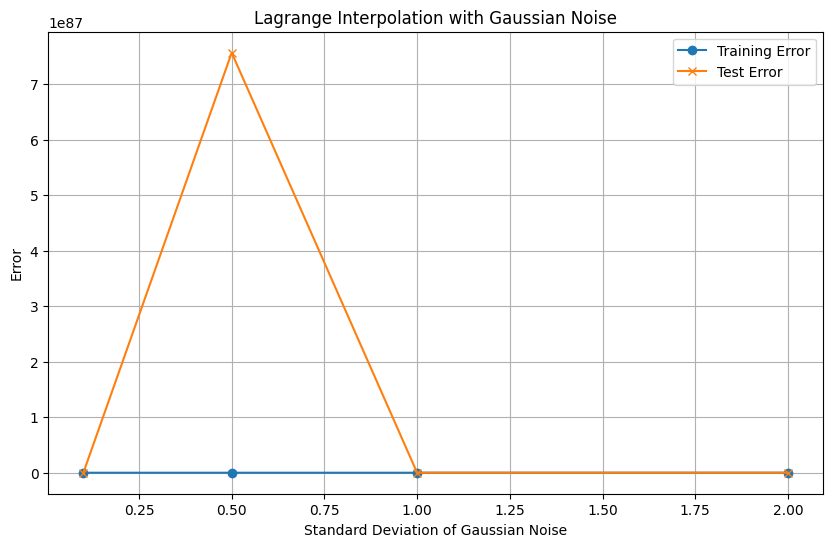

In [14]:
def add_gaussian_noise(data, std_dev):
    noise = np.random.normal(0, std_dev, data.shape)
    noisy_data = data + noise
    return noisy_data

# Standard deviations for Gaussian noise
std_devs = [0.1,0.5,1.0,2.0]

train_errors_with_noise = []
test_errors_with_noise = []

for std_dev in std_devs:
    x_train_noisy = add_gaussian_noise(x_train, std_dev)
    y_train_noisy = np.sin(x_train_noisy)
    x_test_noisy = add_gaussian_noise(x_test, std_dev)
    y_test_noisy = np.sin(x_test_noisy)

    fn = lagrange(x_train_noisy, y_train_noisy)

    # Calculate the interpolated values for the noisy test set
    y_pred_train_noisy = fn(x_train_noisy)
    y_pred_test_noisy = fn(x_test_noisy)

    # Calculate training and test errors with noise
    train_error_noisy = np.mean(np.abs(y_train_noisy - y_pred_train_noisy))
    test_error_noisy = np.mean(np.abs(y_test_noisy - y_pred_test_noisy))

    train_errors_with_noise.append(train_error_noisy)
    test_errors_with_noise.append(test_error_noisy)

# Print results with noise
for i, std_dev in enumerate(std_devs):
    print(f"Training Error (with noise, std_dev={std_dev}):", train_errors_with_noise[i])
    print(f"Test Error (with noise, std_dev={std_dev}):", test_errors_with_noise[i])

# Plot the results with noise
plt.figure(figsize=(10, 6))
plt.plot(std_devs, train_errors_with_noise, label='Training Error', marker='o')
plt.plot(std_devs, test_errors_with_noise, label='Test Error', marker='x')
plt.xlabel('Standard Deviation of Gaussian Noise')
plt.ylabel('Error')
plt.title('Lagrange Interpolation with Gaussian Noise')
plt.legend()
plt.grid(True)
plt.show()
